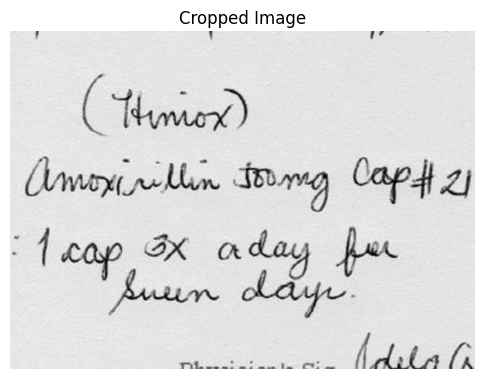

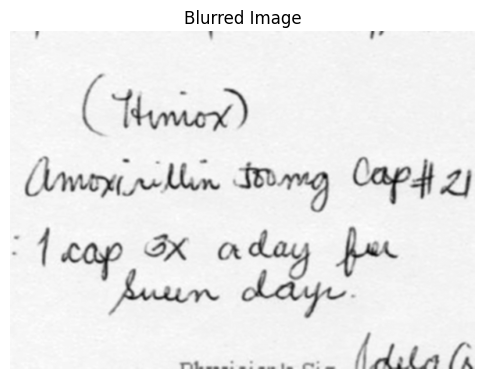

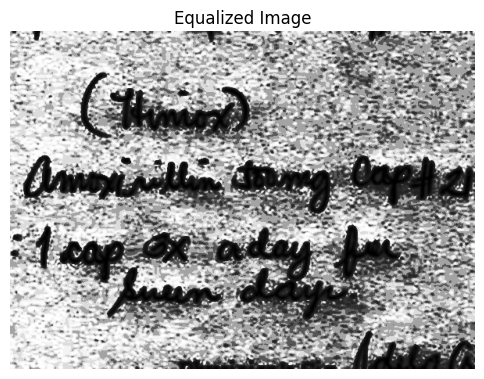

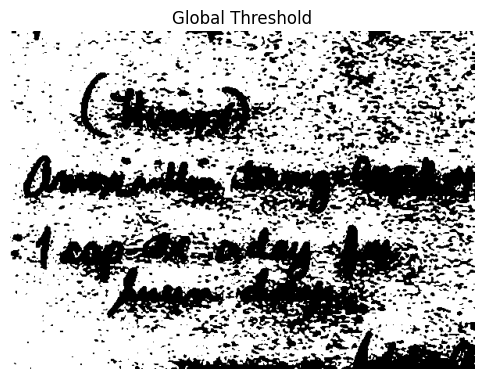

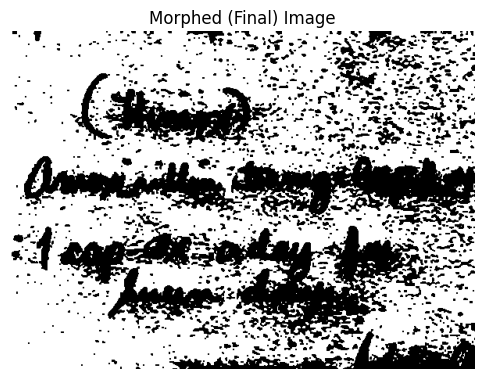


🩺 Extracted Text:

ne ae Ete aR Sie
“NM Kery EAS Partai
2 ie * ih oe 4 ue pes
OS es SS el.
we. TTB gas +E es
ome Salem pieae pags <2 nee Ml



In [4]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import os

# Configure Tesseract path
pytesseract.pytesseract.tesseract_cmd =r"Tesseract-OCR\tesseract.exe"

def show_image(title, img, cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def preprocess_image(image_path):
    if not os.path.exists(image_path):
        print(f"❗ Image file '{image_path}' not found.")
        return None

    # Step 1: Read image in grayscale
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = img_gray.shape

    # Step 2: Crop middle section (remove top and bottom areas)
    crop_width = int(width * 0.7)
    crop_height = int(height * 0.6)
    start_x = (width - crop_width) // 2
    start_y = int(height * 0.2)
    cropped_img = img_gray[start_y:start_y + crop_height, start_x:start_x + crop_width]
    show_image("Cropped Image", cropped_img)

    # Step 3: Denoising
    blurred = cv2.GaussianBlur(cropped_img, (5, 5), 0)
    show_image("Blurred Image", blurred)

    # Step 4: Histogram Equalization
    equalized = cv2.equalizeHist(blurred)
    show_image("Equalized Image", equalized)

    # Step 5: Global Thresholding (instead of adaptive)
    _, binary = cv2.threshold(equalized, 127, 255, cv2.THRESH_BINARY)
    show_image("Global Threshold", binary)

    # Step 6: Morphological Closing to connect broken text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    show_image("Morphed (Final) Image", morphed)

    return morphed

def extract_text(image_path):
    preprocessed_img = preprocess_image(image_path)
    if preprocessed_img is not None:
        text = pytesseract.image_to_string(preprocessed_img, config='--psm 6')
        print("\n🩺 Extracted Text:\n")
        print(text)

# ✅ Use your image here
extract_text("p.png")
